# Part One: EDA

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

# import the EDA functions I've built in a Python script
from eda import *

In [2]:
# set display options
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gtd/globalterrorismdb_0617dist.csv', 
                 encoding='Windows-1252', 
                 low_memory=False)

eda(df, dup_kwd=dict(show=False))

Head of the dataframe:

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America       NaN   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia       NaN   

            city   latitude   longitude  specificity  vi

Number of nulls in each column:
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            162886
extended                   0
resolution            168131
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
location              122376
summary                66138
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           164720
attacktype2_txt       164720
attacktype3           169976
attacktype3

                   approxdate resolution country_txt  \
count                    7464       2219      170350   
unique                   1833       1859         205   
top     September 18-24, 2016   8/4/1998        Iraq   
freq                      101         18       22130   

                        region_txt provstate     city  \
count                       170350    155848   169904   
unique                          12      2494    33957   
top     Middle East & North Africa   Baghdad  Unknown   
freq                         46511      7238     9162   

                                                location  \
count                                              47974   
unique                                             39816   
top     The attack took place in Baghdad, Baghdad, Iraq.   
freq                                                 142   

                                                                                                    summary  \
count                

Number of duplicated rows: 0


In [4]:
# show value counts for each variable with number of unique values no greater than 50
category_counts(df, max_nunique=50, numeric=True)

2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: iyear, dtype: int64


5     15771
7     15247
8     14802
10    14728
3     14284
6     14258
4     14213
11    14064
1     14036
9     13246
2     12975
12    12706
0        20
Name: imonth, dtype: int64


15    6064
1     6020
4     5818
16    5747
10    5699
9     5693
14    5682
3     5679
13    5656
12    5642
11    5615
7     5598
2     5590


Explosives/Bombs/Dynamite                                                      86704
Firearms                                                                       55273
Unknown                                                                        13852
Incendiary                                                                     10459
Melee                                                                           3338
Chemical                                                                         293
Sabotage Equipment                                                               130
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      116
Other                                                                            104
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Minor (likely < $1 million)                     40569
Unknown                                         19066
Major (likely > $1 million but < $1 billion)      904
Catastrophic (likely > $1 billion)                  6
Name: propextent_txt, dtype: int64


 0.0    157411
 1.0     12492
-9.0       269
Name: ishostkid, dtype: int64


 0.0     12005
 1.0       249
-99.0       60
 2.0        54
 3.0        23
 4.0        13
 6.0         5
 5.0         4
 7.0         2
 10.0        2
 9.0         2
 11.0        2
 56.0        2
 13.0        1
 66.0        1
 50.0        1
 30.0        1
 70.0        1
 86.0        1
 21.0        1
 19.0        1
 38.0        1
 15.0        1
 17.0        1
 8.0         1
 54.0        1
 35.0        1
Name: nhostkidus, dtype: int64


-99.00     1791
 0.00      1293
 1.00       184
 2.00       101
 3.00        61
 4.00        43
 6.00        31
 12.00       22
 10.00       19
 5.00        19
 999.00      16
 8.00        11
-9.00        11
 7.00        11
 9.00   

In [7]:
# aggregate the number of attacks by year
attacks_global = df.groupby('iyear').eventid.agg(['count']).reset_index()
attacks_global.columns = ['year', 'attack']
eda(attacks_global)

Head of the dataframe:

   year  attack
0  1970     651
1  1971     470
2  1972     496
3  1973     473
4  1974     580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
year      46 non-null int64
attack    46 non-null int64
dtypes: int64(2)
memory usage: 816.0 bytes


No null in the dataframe.


             year        attack
count    46.00000     46.000000
mean   1993.00000   3703.260870
std      13.86282   3714.155166
min    1970.00000    470.000000
25%    1981.25000   1347.750000
50%    1993.00000   2865.000000
75%    2004.75000   4214.000000
max    2016.00000  16860.000000


Number of duplicated rows: 0


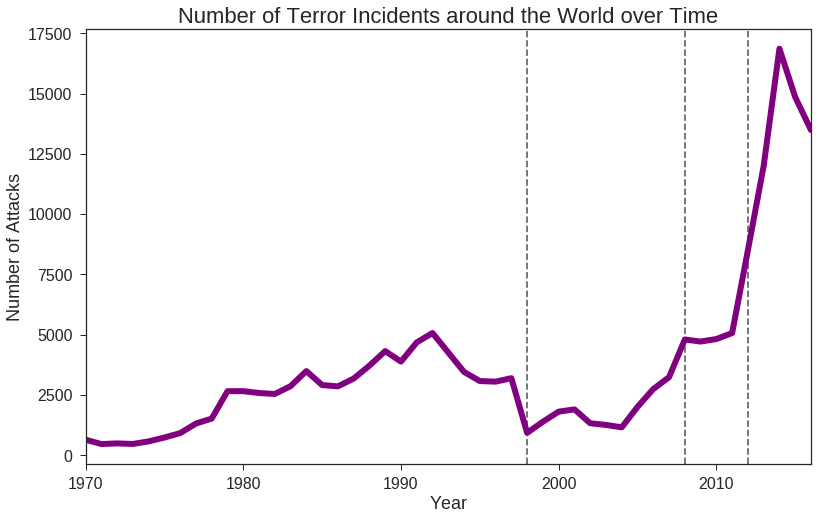

In [8]:
# plot the total number of attacks vs. year
fig = plt.figure(figsize=(13,8))
ax = fig.gca()

# years around which changes in data collection and coding methodologies occurred
# according to http://start.umd.edu/gtd/faq/#q10
for year in [1998, 2008, 2012]:
    ax.axvline(year, linestyle='dashed', color='black', alpha=.6)

ax.plot(attacks_global.year, attacks_global.attack, color='purple', lw=6)
ax.set_xlim(attacks_global.year.min(), attacks_global.year.max())

ax.set_title('Number of Terror Incidents around the World over Time', fontsize=22)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

In [5]:
# aggregate the number of attacks by region and year
attacks_regional = df.groupby(['region_txt', 'iyear']).eventid.agg(['count']).reset_index()
attacks_regional.columns = ['region', 'year', 'attack']
eda(attacks_regional)

Head of the dataframe:

                  region  year  attack
0  Australasia & Oceania  1970       1
1  Australasia & Oceania  1971       1
2  Australasia & Oceania  1972       2
3  Australasia & Oceania  1973       1
4  Australasia & Oceania  1974       1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
region    516 non-null object
year      516 non-null int64
attack    516 non-null int64
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


No null in the dataframe.


              year       attack
count   516.000000   516.000000
mean   1993.666667   330.135659
std      13.575296   746.920321
min    1970.000000     1.000000
25%    1982.000000    12.000000
50%    1994.500000    93.500000
75%    2005.000000   328.000000
max    2016.000000  6919.000000


                            region
count                          516
unique                          12
top     Middle East & North Africa
freq                            46




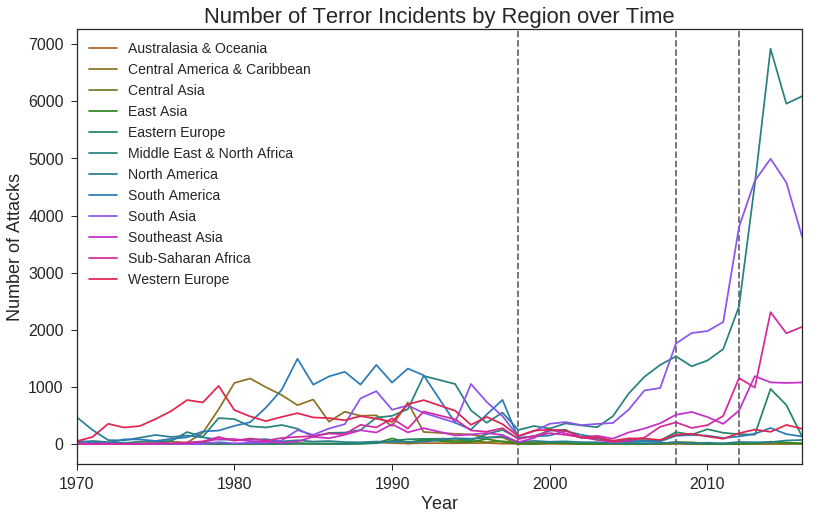

In [6]:
# plot the number of attacks vs. year by region
fig = plt.figure(figsize=(13,8))
ax = fig.gca()

# years around which changes in data collection and coding methodologies occurred
# according to http://start.umd.edu/gtd/faq/#q10
for year in [1998, 2008, 2012]:
    ax.axvline(year, linestyle='dashed', color='black', alpha=.6)

attacks_regional['dummy'] = 0
sns.tsplot(attacks_regional, time='year', unit='dummy', 
           value='attack', condition='region', 
           color=sns.husl_palette(n_colors=12, h=0.1, s=0.9, l=0.5), ax=ax)

ax.set_title('Number of Terror Incidents by Region over Time', fontsize=22)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.legend(fontsize=14)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

In [9]:
# aggregate the number of attacks by type and year
attacks_type = df.groupby(['attacktype1_txt', 'iyear']).eventid.agg(['count']).reset_index()
attacks_type.columns = ['type', 'year', 'attack']
eda(attacks_type)

Head of the dataframe:

            type  year  attack
0  Armed Assault  1970      61
1  Armed Assault  1971      44
2  Armed Assault  1972      63
3  Armed Assault  1973      62
4  Armed Assault  1974      46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 3 columns):
type      407 non-null object
year      407 non-null int64
attack    407 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.6+ KB


No null in the dataframe.


              year       attack
count   407.000000   407.000000
mean   1993.184275   418.550369
std      13.674540   931.638263
min    1970.000000     1.000000
25%    1981.000000    20.000000
50%    1994.000000   113.000000
75%    2005.000000   412.000000
max    2016.000000  8775.000000


                     type
count                 407
unique                  9
top     Bombing/Explosion
freq                   46


Number of duplicated rows: 0


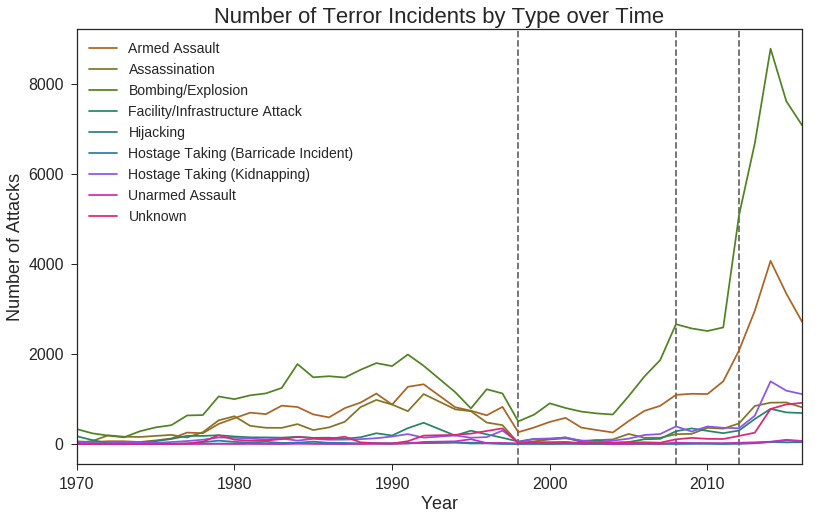

In [10]:
# plot the number of attacks vs. year by attack type
fig = plt.figure(figsize=(13,8))
ax = fig.gca()

# years around which changes in data collection and coding methodologies occurred
# according to http://start.umd.edu/gtd/faq/#q10
for year in [1998, 2008, 2012]:
    ax.axvline(year, linestyle='dashed', color='black', alpha=.6)

attacks_type['dummy'] = 0
sns.tsplot(attacks_type, time='year', unit='dummy', 
           value='attack', condition='type', 
           color=sns.husl_palette(n_colors=9, h=0.1, s=0.9, l=0.5), ax=ax)

ax.set_title('Number of Terror Incidents by Type over Time', fontsize=22)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.legend(fontsize=14)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

# Part Two: Bayesian Inference

In [11]:
# take a closer look at South Asia in 2016
sa2016 = df[(df.region_txt=='South Asia') & (df.iyear==2016)].copy()
sa2016.country_txt.value_counts()

Afghanistan    1615
India          1019
Pakistan        861
Bangladesh       88
Nepal            43
Maldives          1
Sri Lanka         1
Name: country_txt, dtype: int64

In [12]:
from datetime import datetime
convert_to_date = lambda row: datetime(row[1], row[2], row[3])

sa2016['date'] = sa2016.apply(convert_to_date, axis=1)
sa2016['week'] = sa2016.date.dt.week
sa2016.week = sa2016.week.apply(lambda x: 1 if x == 53 else x+1)
print(sa2016.date.head())
print(sa2016.week.head())

156863   2016-01-01
156864   2016-01-01
156865   2016-01-01
156880   2016-01-01
156881   2016-01-01
Name: date, dtype: datetime64[ns]
156863    1
156864    1
156865    1
156880    1
156881    1
Name: week, dtype: int64


In [13]:
# aggregate the number of attacks by week and country
sa2016_attacks = sa2016.groupby(['week', 'country_txt']).eventid.agg(['count']).reset_index()
sa2016_attacks.columns = ['week', 'country', 'attack']

sa2016_attacks.head()

,week,country,attack
0,1,Afghanistan,8
1,1,Bangladesh,1
2,1,India,10
3,1,Pakistan,8
4,1,Sri Lanka,1


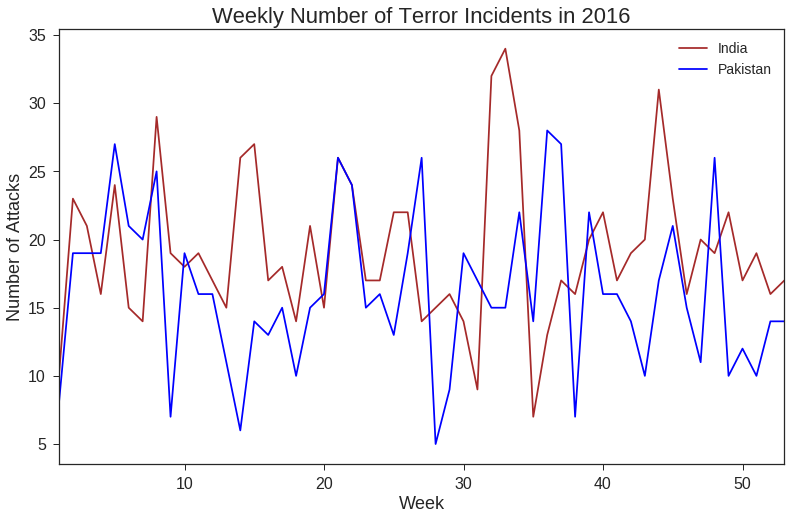

In [14]:
# compare India and Pakistan

fig = plt.figure(figsize=(13,8))
ax = fig.gca()

India2016 = sa2016_attacks[sa2016_attacks.country=='India']
Pakistan2016 = sa2016_attacks[sa2016_attacks.country=='Pakistan']

ax.plot(India2016.week, India2016.attack, color='brown', label='India')
ax.plot(Pakistan2016.week, Pakistan2016.attack, color='blue', label='Pakistan')
ax.set_xlim(1, 53)

ax.set_title('Weekly Number of Terror Incidents in 2016', fontsize=22)
ax.set_xlabel('Week', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.legend(fontsize=14)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

In [15]:
# set up priors for mean (using the distribution for the whole region (South Asia) as prior)
mean_prior_mean = sa2016_attacks.attack.mean()
mean_prior_std = sa2016_attacks.attack.std()

with pm.Model() as model:    
    india_mean = pm.Normal('India_mean', mean_prior_mean, sd=mean_prior_std)
    pakistan_mean = pm.Normal('Pakistan_mean', mean_prior_mean, sd=mean_prior_std)

In [16]:
# set up priors for standard deviations
std_prior_lower = 0.01
std_prior_upper = 60.

with model:    
    india_std = pm.Uniform('India_std', lower=std_prior_lower, upper=std_prior_upper)
    pakistan_std = pm.Uniform('Pakistan_std', lower=std_prior_lower, upper=std_prior_upper)

In [17]:
# construct posterior distributions
with model:    
    india = pm.Normal('India', mu=india_mean, sd=india_std, observed=India2016.attack)
    pakistan = pm.Normal('Pakistan', mu=pakistan_mean, sd=pakistan_std, observed=Pakistan2016.attack)

In [18]:
# define additional metrics
with model:
    diff_of_means = pm.Deterministic('difference of means', india_mean - pakistan_mean)
    diff_of_stds = pm.Deterministic('difference of stds', india_std - pakistan_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((india_std**2 + pakistan_std**2) / 2))

In [20]:
%%time

# fit the model with MCMC
with model:
    trace = pm.sample(30000, njobs=10)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -346.92: 100%|██████████| 200000/200000 [00:14<00:00, 13549.73it/s]
Finished [100%]: Average ELBO = -346.93
100%|██████████| 30000/30000 [01:57<00:00, 254.78it/s]


CPU times: user 23.4 s, sys: 2 s, total: 25.4 s
Wall time: 2min 22s


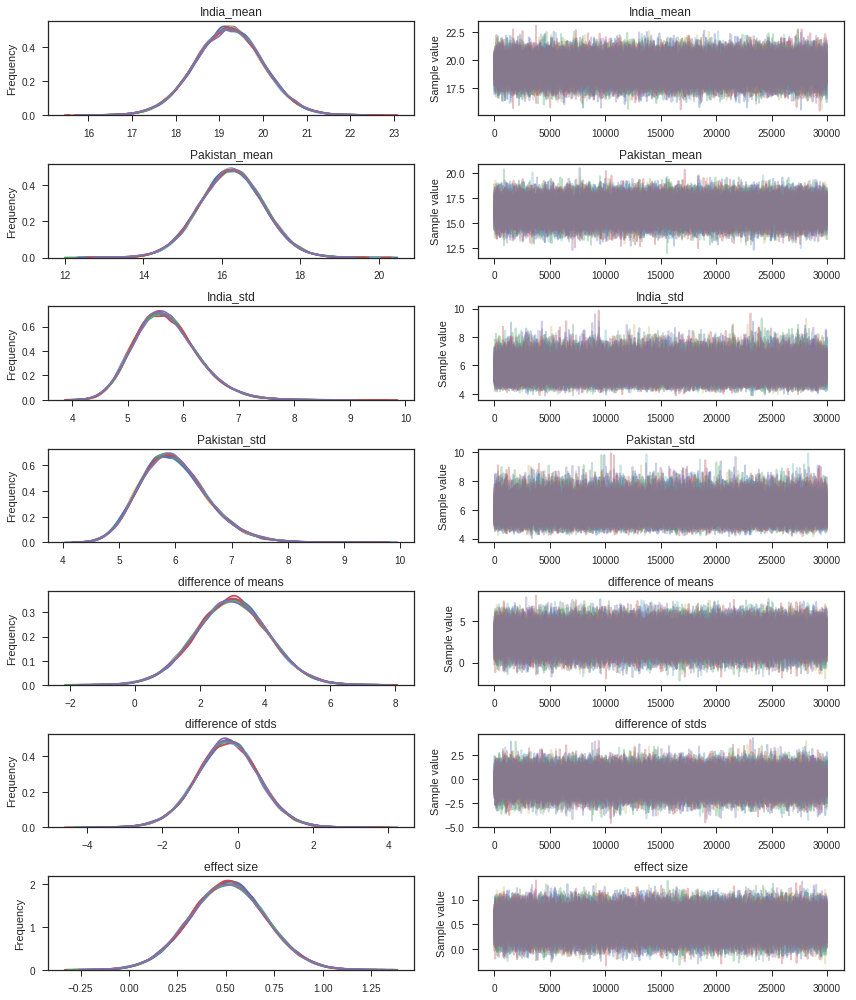

In [21]:
pm.traceplot(trace);

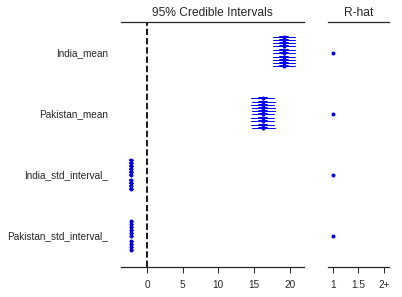

In [22]:
pm.forestplot(trace[3000:], 
              varnames=[v.name for v in model.vars]);

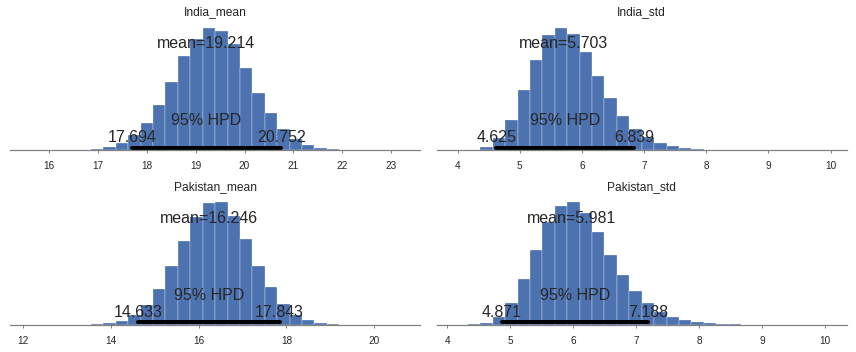

In [27]:
pm.plot_posterior(trace[3000:], 
                  varnames=['India_mean', 'India_std',
                            'Pakistan_mean', 'Pakistan_std']);

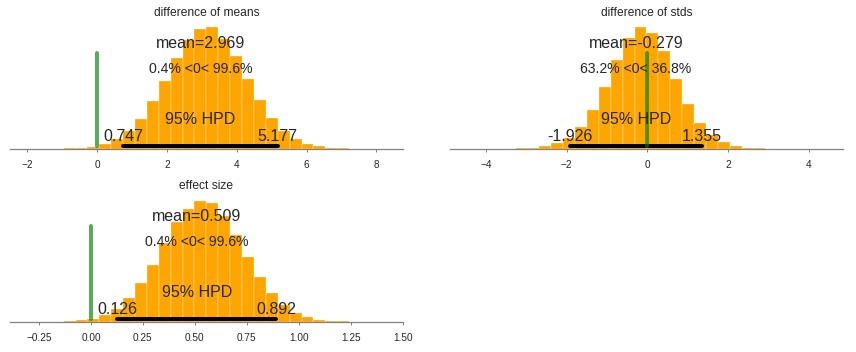

In [26]:
pm.plot_posterior(trace[3000:], 
                  varnames=['difference of means', 
                            'difference of stds', 
                            'effect size'], 
                  ref_val=0,
                  color='orange');

In [25]:
pm.summary(trace[3000:],
           varnames=['difference of means', 
                     'difference of stds', 
                     'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.969            1.128            0.002            [0.747, 5.177]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.756          2.212          2.970          3.725          5.187


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.279           0.832            0.002            [-1.926, 1.355]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.931         -0.825         -0.275         0.271          1.351


effect size:

  Mean             SD               MC Error         95% HPD in

The 95% HPD of the two means slightly overlap, but the 95% HPD of the difference of means does not cross zero; 
the 95% HPD of the two standard deviations overlap, and the difference of standard deviations crosses zero; the 95% HPD of the effect size does not cross zero. Taken together, the difference in the average numbers of attacks per week in India and Pakistan in 2016 is statistically significant.

# Part Three: 1993
impute the number of bombing/explosions that occurred in 1993

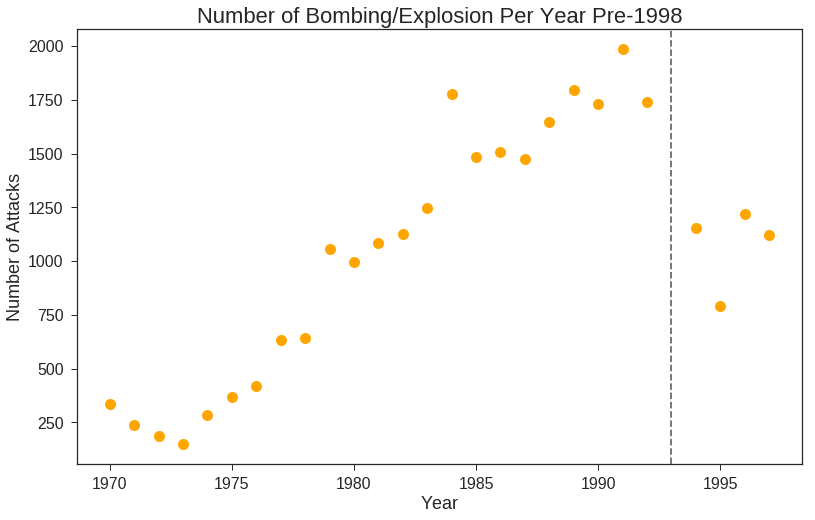

In [49]:
# take a closer look at the numbers of bombing/explosions before 1998
bomb_pre1998 = df[(df.iyear<1998) & (df.attacktype1_txt=='Bombing/Explosion')]
bomb_yearly = bomb_pre1998.groupby('iyear').eventid.agg(['count']).reset_index()
bomb_yearly.columns = ['year', 'attack']

# plot the total number of bombing/esplosion vs. year (pre-1998)
fig = plt.figure(figsize=(13,8))
ax = fig.gca()

ax.scatter(bomb_yearly.year, bomb_yearly.attack, color='orange')    
ax.axvline(1993, linestyle='dashed', color='black', alpha=.6)

ax.set_title('Number of Bombing/Explosion Per Year Pre-1998', fontsize=22)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

There appears to be a downward trend between 1991 and 1995 after the upward trend since the early 1970s.

In [55]:
# impute the number in 1993 by simply averaging the numbers in years 1991, 1992, 1994, and 1995
attack_sum = 0
for year in [1991, 1992, 1994, 1995]:
    index = bomb_yearly[bomb_yearly.year==year].index
    attack_sum += bomb_yearly.loc[index[0], 'attack']
attack_1993 = int(attack_sum / 4)
attack_1993

1417

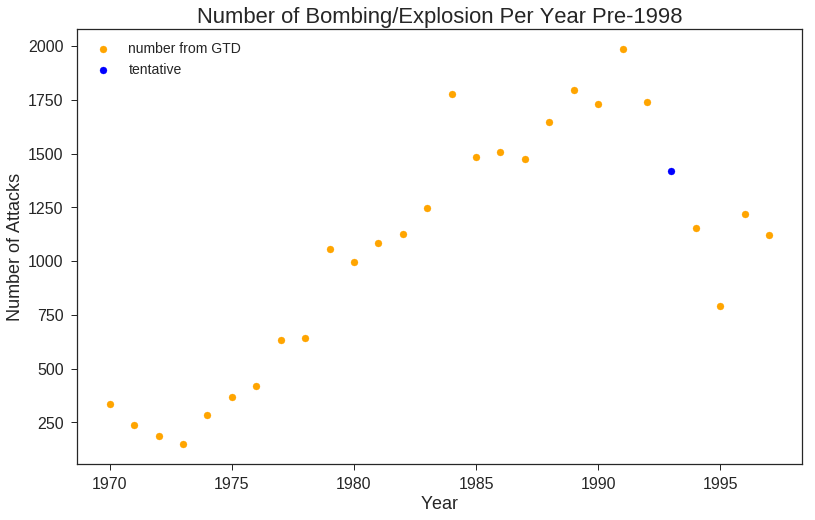

In [57]:
# plot the total number of bombing/esplosion vs. year (pre-1998)
fig = plt.figure(figsize=(13,8))
ax = fig.gca()

ax.scatter(bomb_yearly.year, bomb_yearly.attack, color='orange', label='number from GTD') 
ax.scatter(1993, attack_1993, color='blue', label='tentative')  

ax.set_title('Number of Bombing/Explosion Per Year Pre-1998', fontsize=22)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of Attacks', fontsize=18)
ax.legend(loc='upper left', fontsize=14)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

# Part Four: Methods
## Bayesian Inference
In this part, Bayesian posterior estimation was used to compare the numbers of terror incidents in India and Pakistan in 2016.  
  
First, the numbers of terror incidents were summed by the week and these numbers were used as observations.  
  
To set up the Bayesian model, first, the mean and standard deviation of the weekly numbers of incidents in the whole region of South Asia in 2016 were computed. These vlaues were used to inform the priors about the weekly numbers of incidents.  
  
The same priors were set up for both India and Pakistan: normal distribution was assumed for the prior on the mean weekly number, using the overall mean and standard deviation of the weekly numbers in South Asia; as for the prior on the standard deviations, a uniform distribution from close to 0 up to 60 was assumed. This is an uninformative prior.  
  
Next, normal distribution was used to represent the likelihood for the weekly numbers of incidents for each of India and Pakistan. For each country, the mean was the prior distribution of the mean; likewise, the standard deviation was the prior distribution of the standard deviation. The actual observations would be given to the likelihoods as a parameter when the model was fit.  
  
Lastly, to help evaluate the difference between the mean weekly numbers of incidents, some other distributions were defined. These included the difference of means between the two countries, the difference of standard deviations between the two countries, and the effect size (a normalized measure of the strength of a difference between the means).  
  
The model was then fit using Markov Chain Monte Carlo (MCMC), and the posteiror distributions was updated according to the priors and the actual data.  
  
The estimation showed that the 95% Highest Posterior Density interval (HPD) of the two means slightly overlap, but the 95% HPD of the difference of means does not cross zero; the 95% HPD of the two standard deviations overlap, and the difference of standard deviations crosses zero; the 95% HPD of the effect size does not cross zero. Taken together, the difference in the average numbers of attacks per week in India and Pakistan in 2016 is statistically significant.  
  
## Imputing Missing Data in 1993  
The total numbers of bombing/explosions per year before 1998 were examined. The cutoff point of 1998 was chosen because there was a change in data collection methodology around the time ([1](http://start.umd.edu/gtd/faq/#q10),[2](http://start.umd.edu/news/discussion-point-benefits-and-drawbacks-methodological-advancements-data-collection-and-coding)). There appears to be a downward trend between 1991 and 1995 after the upward trend since the early 1970s. The number of bombing/explosions in 1993 was imputed by simply averaging the numbers in the adjacent years 1991, 1992, 1994, and 1995. The estimated number for 1993 was 1417.